# Preparación del dataset de VENTAS 2022 ZAFIRO

## 1. Librerias y configuraciones previas


In [1]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np


# Gestion de librerias
# ==============================================================================
from importlib import reload


# Matemáticas y estadísticas
# ==============================================================================
import math

# Preparación de datos
# ==============================================================================
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.neighbors import LocalOutlierFactor


# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
!pip install ydata-profiling
import pandas as pd
from ydata_profiling import ProfileReport

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

## 2. Funciones

In [2]:
#reload(utils.funciones)

# Funciones externas
# ==============================================================================
from funciones import multiple_plot

## 3. Carga del dataset

Este dataset extraido del software *e-com* (nombrado: **Consolidado_ventas_2022.xlsx** ) contiene información sobre **las ventas por referencias y clientes**, los cuales serán usados para la clusterizacion de usuarios segun las ventas, a partir de las diferentes variables.

In [3]:
#Cargar el dataset
d=pd.read_excel('/content/Zafiro_2.xlsx')

In [4]:
df=d.copy()

In [5]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47734 entries, 0 to 47733
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Mes                     47734 non-null  object
 1   Cliente                 47734 non-null  int64 
 2   Cliente2                47734 non-null  object
 3   Edad Empresa Cliente    47734 non-null  int64 
 4   Exhibidor               47734 non-null  object
 5   Recuento de Referencia  47734 non-null  int64 
 6   Suma de Cant. Dev.      47734 non-null  int64 
 7   Suma de Cant. Neta      47734 non-null  int64 
 8   Suma de Vta. - IVA      47734 non-null  int64 
dtypes: int64(6), object(3)
memory usage: 3.3+ MB


In [6]:
d.head(2)

,Mes,Cliente,Cliente2,Edad Empresa Cliente,Exhibidor,Recuento de Referencia,Suma de Cant. Dev.,Suma de Cant. Neta,Suma de Vta. - IVA
0,ABRIL,20173,DAGOBERTO CONTRERAS,10,SI,21,0,163,289265
1,ABRIL,22621,BEATRIZ CECILIA GIRALDO PEINADO,10,NO,4,0,4,9824


In [7]:
profile = ProfileReport(d, title="Profiling Report")
profile

Output hidden; open in https://colab.research.google.com to view.

## 4. Limpieza de datos (Data Cleaning)

In [8]:
#Borrando columnas que no se utilizarán
d.drop(["Cliente","Cliente2"],inplace=True,axis=1)
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47734 entries, 0 to 47733
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Mes                     47734 non-null  object
 1   Edad Empresa Cliente    47734 non-null  int64 
 2   Exhibidor               47734 non-null  object
 3   Recuento de Referencia  47734 non-null  int64 
 4   Suma de Cant. Dev.      47734 non-null  int64 
 5   Suma de Cant. Neta      47734 non-null  int64 
 6   Suma de Vta. - IVA      47734 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 2.5+ MB


In [9]:
#Verificación y eliminación de registros duplicados

#Verificación de registros duplicados
d.loc[d.duplicated()]

,Mes,Edad Empresa Cliente,Exhibidor,Recuento de Referencia,Suma de Cant. Dev.,Suma de Cant. Neta,Suma de Vta. - IVA
70,ABRIL,10,NO,7,0,7,22949
215,ABRIL,11,NO,4,0,4,9824
361,ABRIL,11,NO,4,0,4,9824
444,ABRIL,11,NO,4,0,4,9824
455,ABRIL,11,NO,4,0,4,9824
...,...,...,...,...,...,...,...
47455,SEPTIEMBRE,0,NO,2,0,2,12748
47497,SEPTIEMBRE,0,NO,3,0,3,19874
47560,SEPTIEMBRE,0,NO,1,0,1,16134
47652,SEPTIEMBRE,0,NO,3,0,3,19874


In [10]:
# eliminación de registros duplicados
d = d.drop_duplicates()

#Reiniciar el indice
d.reset_index(drop=True, inplace=True)

In [11]:
d.head(2)

,Mes,Edad Empresa Cliente,Exhibidor,Recuento de Referencia,Suma de Cant. Dev.,Suma de Cant. Neta,Suma de Vta. - IVA
0,ABRIL,10,SI,21,0,163,289265
1,ABRIL,10,NO,4,0,4,9824


## 5. Visualización de datos

### Variables de entrada

In [12]:
#Lista de variables categóricas
catCols = d.select_dtypes(include = ["object", 'category']).columns.tolist()

d[catCols].head(2)

,Mes,Exhibidor
0,ABRIL,SI
1,ABRIL,NO


In [13]:
#Lista de variables numéricas

numCols=d.select_dtypes(include = ['float64','int32','int64']).columns.tolist()
d[numCols].head()

,Edad Empresa Cliente,Recuento de Referencia,Suma de Cant. Dev.,Suma de Cant. Neta,Suma de Vta. - IVA
0,10,21,0,163,289265
1,10,4,0,4,9824
2,10,27,0,106,349024
3,10,30,5,227,462780
4,10,15,8,12,70875


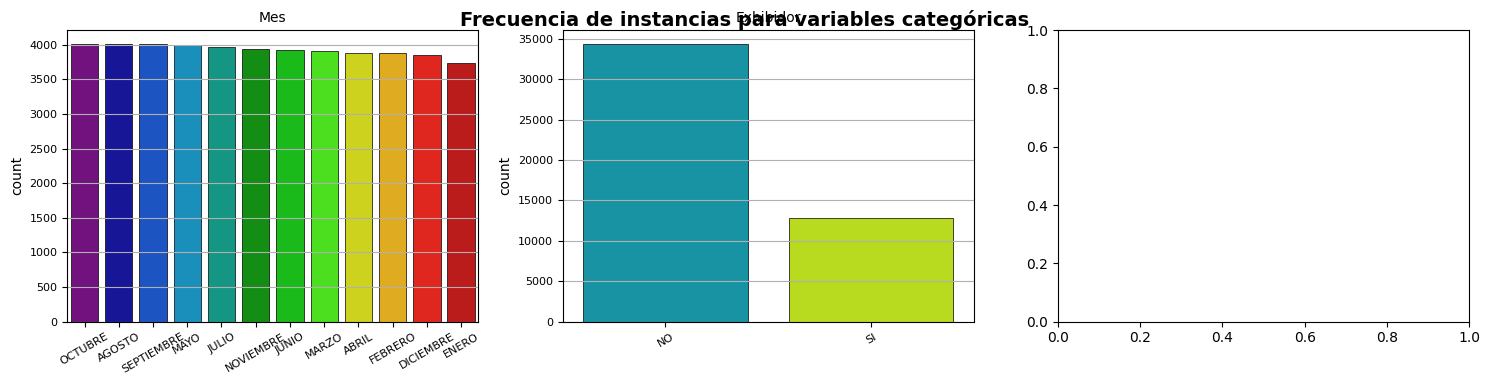

In [14]:
#Visualización de frecuencia de instancias para variables categóricas
multiple_plot(3, d , catCols, None, 'countplot', 'Frecuencia de instancias para variables categóricas',30)

In [15]:
# Distribución de cada variable categórica en el conjunto de datos

for col in catCols:
    print("="*5 + f" {col} " + "="*20)
    print(d[col].value_counts())
    print()

===== Mes ====================
Mes
OCTUBRE       4013
AGOSTO        4011
SEPTIEMBRE    4005
MAYO          3992
JULIO         3970
NOVIEMBRE     3941
JUNIO         3930
MARZO         3917
ABRIL         3884
FEBRERO       3881
DICIEMBRE     3847
ENERO         3742
Name: count, dtype: int64

===== Exhibidor ====================
Exhibidor
NO    34367
SI    12766
Name: count, dtype: int64



In [16]:
#multiple_plot(1, d , 'Make', 'Price', 'boxplot', 'Distribución de la variable próposito vs la edad',90)

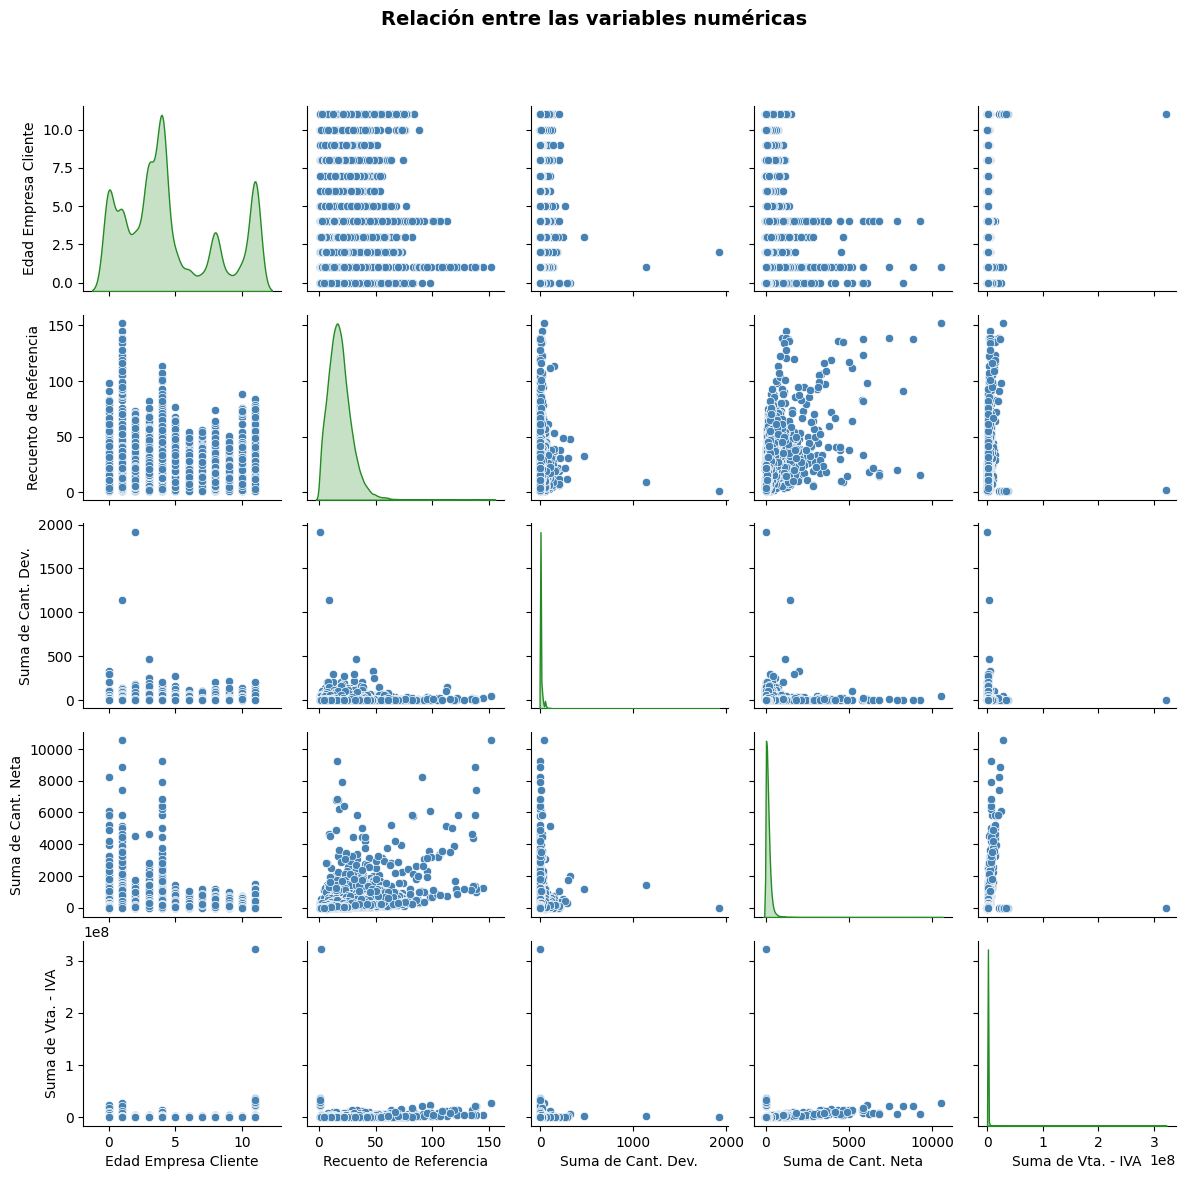

In [17]:
#Visualización de variables numéricas con respecto al precio
multiple_plot(1, d , numCols, None, 'scatterplot', 'Relación entre las variables numéricas',30)

### Variable de salida

In [18]:
#Configuración de formato de visualización
pd.set_option('display.float_format', lambda x: '%.0f' % x)

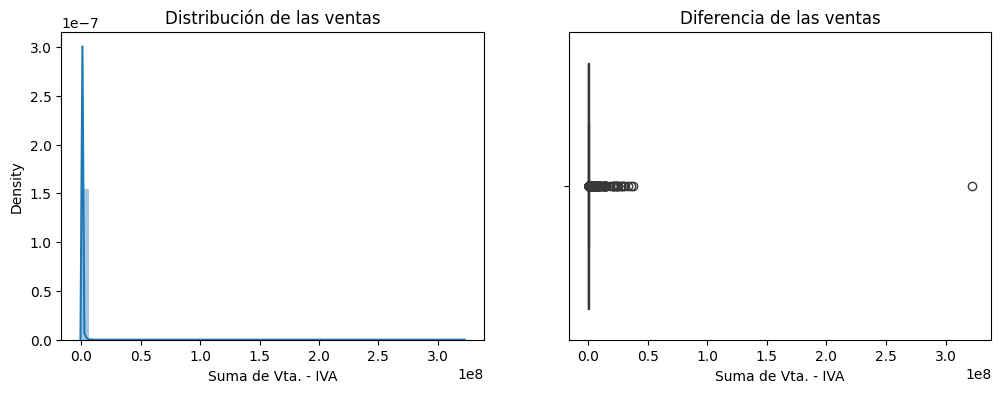

In [19]:
#Histográma y caja de bigotes del precio de los vehículos

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('Distribución de las ventas')
sns.distplot(d['Suma de Vta. - IVA'])

plt.subplot(1,2,2)
plt.title('Diferencia de las ventas')
sns.boxplot(x=d['Suma de Vta. - IVA'], palette='nipy_spectral')

plt.show()

In [20]:
#Descripción del precio de los vehículos: Total, media, desviación, mínimo, máximo y percentiles

#Descripción
print(d['Suma de Vta. - IVA'].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,0.975,1]))

count       47133
mean       416034
std       1655228
min       -234038
25%        154822
50%        284395
75%        472825
85%        624659
90%        766011
95%       1072344
97.5%     1483818
100%    322184756
max     322184756
Name: Suma de Vta. - IVA, dtype: float64


## 6. Preparación de datos

### Valores atípicos de la variable de salida

In [21]:
#Calculo de valores atípicos


#Calculo de Q1 t Q3
Q1 = np.percentile(d['Suma de Vta. - IVA'], 25, interpolation = 'midpoint')
Q3 = np.percentile(d['Suma de Vta. - IVA'], 75, interpolation = 'midpoint')

#Cálculo del rango intercuartil
IQR = Q3 - Q1

#Cálculo de valor mínimo y máximo para los valores atípicos
VAInf = Q1 - 1.5*IQR
VASup = Q3 + 1.5*IQR

print(f'Valor atípico leve inferior:{VAInf}')
print(f'Valor atípico leve superior:{VASup}')


Valor atípico leve inferior:-322182.5
Valor atípico leve superior:949829.5


In [22]:
# Se eliminan los valores atípicos
d = d.drop(d[d['Suma de Vta. - IVA']>VASup].index)

#Reiniciar el indice
d.reset_index(drop=True, inplace=True)

In [23]:
# Se eliminan los valores atípicos
d = d.drop(d[d['Suma de Vta. - IVA']<0].index)

#Reiniciar el indice
d.reset_index(drop=True, inplace=True)

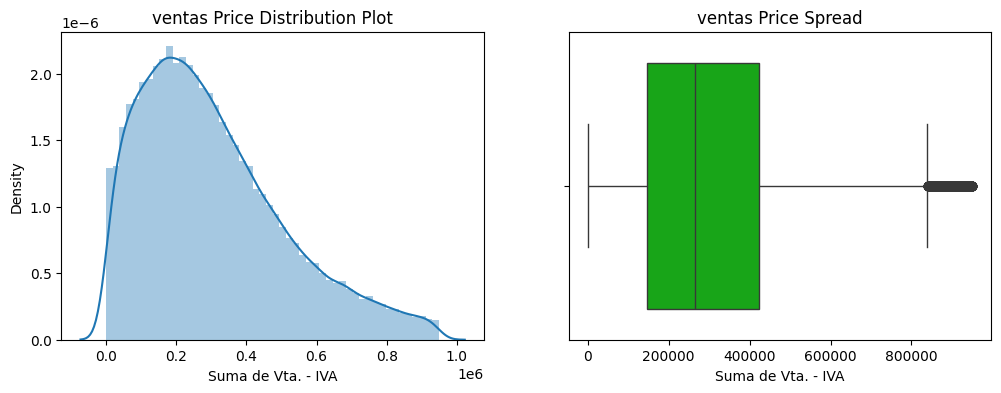

In [24]:
#Histográma y caja de bigotes del precio de los vehículos

plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('ventas Price Distribution Plot')
sns.distplot(d['Suma de Vta. - IVA'])

plt.subplot(1,2,2)
plt.title('ventas Price Spread')
sns.boxplot(x=d['Suma de Vta. - IVA'], palette='nipy_spectral')

plt.show()

In [25]:
#Descripción del precio de los vehículos después de eliminar valores atípicos

print(d["Suma de Vta. - IVA"].describe(percentiles = [0.25,0.50,0.75,0.85,0.90,0.95,0.975,1]))

count    44022
mean    305714
std     207019
min          0
25%     146838
50%     266158
75%     423940
85%     527774
90%     606401
95%     724706
97.5%   813382
100%    949690
max     949690
Name: Suma de Vta. - IVA, dtype: float64


### Imputaciones

In [26]:
#Identificación de valores nulos para las variables numéricas
for col in d[numCols]:
    print (col, np.sum(pd.isnull(d[col])))

Edad Empresa Cliente 0
Recuento de Referencia 0
Suma de Cant. Dev. 0
Suma de Cant. Neta 0
Suma de Vta. - IVA 0


In [27]:
#Identificación de valores nulos para las variables Categoricas
for col in d[catCols]:
    print (col, np.sum(pd.isnull(d[col])))

Mes 0
Exhibidor 0


In [28]:
#verificación de la imputación: No existen valores nulos
for col in d.columns:
    print (col, np.sum(pd.isnull(d[col])))

Mes 0
Edad Empresa Cliente 0
Exhibidor 0
Recuento de Referencia 0
Suma de Cant. Dev. 0
Suma de Cant. Neta 0
Suma de Vta. - IVA 0


### Valores atípicos para las variables de entrada

In [29]:
#utilización de LocalOutlierFactor con 13 vecinos para identificar valores atípicos en las variables de entrada


# crear un objeto LocalOutlierFactor con n_neighbors=13
lof = LocalOutlierFactor(n_neighbors=13, contamination=0.1)

# identificar los valores atípicos por medio de lof
y_pred = lof.fit_predict(d[numCols])

# Identificar los índices de los valores atípicos
outliers = y_pred == -1

print('Indices de valores atípicos: ', d[outliers].index.tolist())


Indices de valores atípicos:  [4, 11, 15, 29, 31, 35, 36, 48, 57, 70, 71, 73, 96, 97, 103, 107, 118, 121, 131, 134, 141, 145, 148, 169, 195, 201, 205, 207, 212, 225, 246, 250, 256, 274, 283, 285, 289, 293, 296, 298, 299, 303, 308, 316, 318, 328, 333, 336, 338, 339, 355, 356, 362, 377, 380, 383, 391, 409, 443, 453, 464, 466, 470, 471, 475, 478, 480, 491, 508, 524, 530, 554, 564, 569, 572, 574, 578, 580, 583, 585, 593, 596, 599, 603, 607, 614, 615, 623, 625, 670, 671, 677, 680, 690, 697, 705, 720, 721, 739, 770, 781, 801, 804, 819, 826, 828, 846, 852, 853, 855, 857, 858, 860, 864, 865, 870, 873, 881, 907, 920, 931, 944, 951, 953, 957, 964, 972, 975, 980, 990, 991, 998, 999, 1006, 1012, 1045, 1047, 1049, 1051, 1087, 1090, 1093, 1121, 1122, 1132, 1135, 1147, 1153, 1156, 1165, 1189, 1220, 1224, 1239, 1277, 1289, 1290, 1306, 1312, 1333, 1352, 1353, 1354, 1355, 1371, 1378, 1381, 1383, 1396, 1424, 1428, 1449, 1487, 1520, 1531, 1535, 1545, 1549, 1552, 1568, 1573, 1577, 1605, 1625, 1679, 1737, 1

In [30]:
# Eliminar los valores atípicos del dataframe original
d = d.loc[~outliers]

### Transformaciones

In [31]:
#Eliminación de categorias pequeñas para la variable Mes

d['Mes'].value_counts().sort_values(ascending=False)

Mes
SEPTIEMBRE    3375
AGOSTO        3371
JULIO         3367
MAYO          3352
NOVIEMBRE     3352
FEBRERO       3334
JUNIO         3326
OCTUBRE       3319
MARZO         3307
ABRIL         3261
DICIEMBRE     3247
ENERO         3008
Name: count, dtype: int64

In [32]:
#Diccionario con los reemplazos a realizar
reemplazos = { "ENERO": "PRIMER TRIMESTRE"
              ,"FEBRERO": "PRIMER TRIMESTRE"
              ,"MARZO": "PRIMER TRIMESTRE"
              ,"ABRIL": "SEGUNDO TRIMESTRE"
              ,"MAYO": "SEGUNDO TRIMESTRE"
              ,"JUNIO": "SEGUNDO TRIMESTRE"
              , "JULIO": "TERCER TRIMESTRE"
              , "AGOSTO": "TERCER TRIMESTRE"
              ,"SEPTIEMBRE": "TERCER TRIMESTRE"
              ,"OCTUBRE": "CUARTO TRIMESTRE"
              , "NOVIEMBRE": "CUARTO TRIMESTRE"
              , "DICIEMBRE": "CUARTO TRIMESTRE"}


#Se reemplazan los valores de acuerdo con el diccionario creado anteriormente
d['Mes'] = d['Mes'].map(reemplazos).fillna(d['Mes'])

#Visualización de las nuevos valores agrupados para la categoria 'Fuel Type'
d['Mes'].value_counts().sort_values(ascending=False)

Mes
TERCER TRIMESTRE     10113
SEGUNDO TRIMESTRE     9939
CUARTO TRIMESTRE      9918
PRIMER TRIMESTRE      9649
Name: count, dtype: int64

In [ ]:
#pd.set_option('display.max_rows')
#pd.reset_option('display.max_rows')

### Datos de prueba

In [33]:
# Porcentaje de filas para la primera parte (por ejemplo, 90%)
percentage_first_part = 0.80

# Número de filas para la primera parte
n_rows_part1 = int(len(d) * percentage_first_part)

# Obtener índices aleatorios para la primer parte
indices_part1 = d.sample(n=n_rows_part1, random_state=123).index

# Obtener índices para la segunda parte (resto de las filas)
indices_part2 = d.index.difference(indices_part1)

# Dividir el DataFrame en dos partes
df = d.loc[indices_part1]
dp = d.loc[indices_part2]

In [ ]:
dp.shape

(124621, 7)

## 7. Exportar el dataset

In [34]:
# Exportamos el dataframe a un archivo CSV
df.to_csv('01_ventas_2022_zafiro_Prep.csv', index=False)
dp.to_csv('01_ventas_2022_zafiro_Prue.csv', index=False)

### Referencias


- *Dataset:*  
    - https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho?select=car+details+v4.csv
    
    
- *Machine learning con Python y Scikit-learn:*
    - https://www.cienciadedatos.net/documentos/py06_machine_learning_python_scikitlearn.html
    
    
- *LocalOutlierFactor:*
    - https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.LocalOutlierFactor.html
    

- *scikit-learn:*    
    - https://scikit-learn.org/stable/
    - https://scikit-learn.org/stable/user_guide.html
  
  
- *Gráficas con  seaborn:*
    - https://ichi.pro/es/como-utilizar-python-seaborn-para-analisis-de-datos-exploratorios-28897898172180

  